<a href="https://colab.research.google.com/github/HugoMagos0725/Analisis_de_datos/blob/main/Proyecto1_Estadistica_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FCFM-BUAP, 2023**

## Proyecto: Estadistica Descriptiva

Nombre: Hugo Cuautle Magos

Matricula: 201847053 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/capturas_2015-2020.xlsx',sheet_name=None)
df

{'2015':             Fecha   Latitud  Longitud                  Ubicacion Municipio  \
 0      2015-01-22  24.11564 -99.03734  177_THUE05-28-030-0415T01   PADILLA   
 1      2015-01-29  24.11564 -99.03734  177_THUE05-28-030-0415T01   PADILLA   
 2      2015-01-29  24.11562 -99.03560  177_THUE05-28-030-0415T02   PADILLA   
 3      2015-01-22  24.11562 -99.03560  177_THUE05-28-030-0415T02   PADILLA   
 4      2015-01-29  24.11726 -99.03528  177_THUE05-28-030-0415T03   PADILLA   
 ...           ...       ...       ...                        ...       ...   
 421355 2015-12-25  24.05003 -98.88733  177_THUE05-28-030-0700T17   PADILLA   
 421356 2015-12-18  24.04981 -98.88465  177_THUE05-28-030-0700T18   PADILLA   
 421357 2015-12-25  24.04981 -98.88465  177_THUE05-28-030-0700T18   PADILLA   
 421358 2015-12-11  24.04981 -98.88465  177_THUE05-28-030-0700T18   PADILLA   
 421359 2015-12-04  24.04981 -98.88465  177_THUE05-28-030-0700T18   PADILLA   
 
                  Comunidad               

In [ ]:
#varianza=df['2015'].groupby(['Municipio','Mes'])['No_DiaphorinasXtrampa'].var()
#suma=df['2015'].groupby(['Municipio','Mes'])['No_DiaphorinasXtrampa'].mean()
#id=varianza/suma
#id

Municipio    Mes 
CASAS        2.0     1.661670
             3.0     2.195331
             4.0     1.974479
             5.0     1.243500
             6.0     1.729581
                       ...   
XICOTENCATL  8.0     0.992410
             9.0     1.000000
             10.0    2.368524
             11.0    2.074004
             12.0         NaN
Name: No_DiaphorinasXtrampa, Length: 114, dtype: float64

In [ ]:
#id[('GOMEZ FARIAS')]

Mes
2.0      0.964029
3.0           NaN
4.0      0.988506
5.0      1.673861
6.0      1.904815
7.0      1.714080
8.0      3.727418
9.0      5.784173
10.0    31.355701
11.0     1.338129
12.0          NaN
Name: No_DiaphorinasXtrampa, dtype: float64

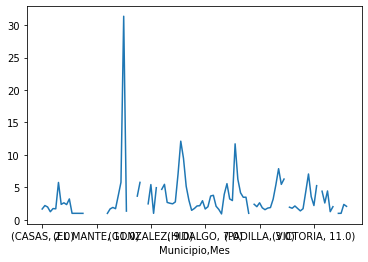

In [ ]:
#id.plot()

## Problema 1

Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes de los  años 2015, 2017, 2020. Es decir una gráfica por cada año donde el eje horizontal esté el mes y el vertical el promedio de diaphorinas por trampa.